In [2]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [64]:
# load the data
# add as header the columns names: statement_id, label, statement, subject, speaker, job_title, state, party, barely_true_c, false_c, half_true_c, mostly_true_c, pants_on_fire_c, context
header = ['statement_id', 'label', 'statement', 'subject', 'speaker', 'job_title', 'state', 'party', 'barely_true_c', 'false_c', 'half_true_c', 'mostly_true_c', 'pants_on_fire_c', 'context']
test_data = pd.read_csv('./liar_dataset/test.tsv', sep='\t', names=header)
train_data = pd.read_csv('./liar_dataset/train.tsv', sep='\t', names=header)
valid_data = pd.read_csv('./liar_dataset/valid.tsv', sep='\t', names=header)


In [65]:
# unit test, train, and valid into one dataset
data = pd.concat([train_data, test_data, valid_data])

In [4]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1267 entries, 0 to 1266
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   statement_id     1267 non-null   object
 1   label            1267 non-null   object
 2   statement        1267 non-null   object
 3   subject          1267 non-null   object
 4   speaker          1267 non-null   object
 5   job_title        942 non-null    object
 6   state            1005 non-null   object
 7   party            1267 non-null   object
 8   barely_true_c    1267 non-null   int64 
 9   false_c          1267 non-null   int64 
 10  half_true_c      1267 non-null   int64 
 11  mostly_true_c    1267 non-null   int64 
 12  pants_on_fire_c  1267 non-null   int64 
 13  context          1250 non-null   object
dtypes: int64(5), object(9)
memory usage: 138.7+ KB


In [4]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10240 entries, 0 to 10239
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   statement_id     10240 non-null  object 
 1   label            10240 non-null  object 
 2   statement        10240 non-null  object 
 3   subject          10238 non-null  object 
 4   speaker          10238 non-null  object 
 5   job_title        7343 non-null   object 
 6   state            8032 non-null   object 
 7   party            10238 non-null  object 
 8   barely_true_c    10238 non-null  float64
 9   false_c          10238 non-null  float64
 10  half_true_c      10238 non-null  float64
 11  mostly_true_c    10238 non-null  float64
 12  pants_on_fire_c  10238 non-null  float64
 13  context          10138 non-null  object 
dtypes: float64(5), object(9)
memory usage: 1.1+ MB


In [50]:
valid_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1284 entries, 0 to 1283
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   statement_id     1284 non-null   object
 1   label            1284 non-null   object
 2   statement        1284 non-null   object
 3   subject          1284 non-null   object
 4   speaker          1284 non-null   object
 5   job_title        939 non-null    object
 6   state            1005 non-null   object
 7   party            1284 non-null   object
 8   barely_true_c    1284 non-null   int64 
 9   false_c          1284 non-null   int64 
 10  half_true_c      1284 non-null   int64 
 11  mostly_true_c    1284 non-null   int64 
 12  pants_on_fire_c  1284 non-null   int64 
 13  context          1272 non-null   object
dtypes: int64(5), object(9)
memory usage: 140.6+ KB


In [51]:
train_data.head()

,statement_id,label,statement,subject,speaker,job_title,state,party,barely_true_c,false_c,half_true_c,mostly_true_c,pants_on_fire_c,context
0,2635.json,false,Says the Annies List political group supports ...,abortion,dwayne-bohac,State representative,Texas,republican,0.0,1.0,0.0,0.0,0.0,a mailer
1,10540.json,half-true,When did the decline of coal start? It started...,"energy,history,job-accomplishments",scott-surovell,State delegate,Virginia,democrat,0.0,0.0,1.0,1.0,0.0,a floor speech.
2,324.json,mostly-true,"Hillary Clinton agrees with John McCain ""by vo...",foreign-policy,barack-obama,President,Illinois,democrat,70.0,71.0,160.0,163.0,9.0,Denver
3,1123.json,false,Health care reform legislation is likely to ma...,health-care,blog-posting,NaN,NaN,none,7.0,19.0,3.0,5.0,44.0,a news release
4,9028.json,half-true,The economic turnaround started at the end of ...,"economy,jobs",charlie-crist,NaN,Florida,democrat,15.0,9.0,20.0,19.0,2.0,an interview on CNN


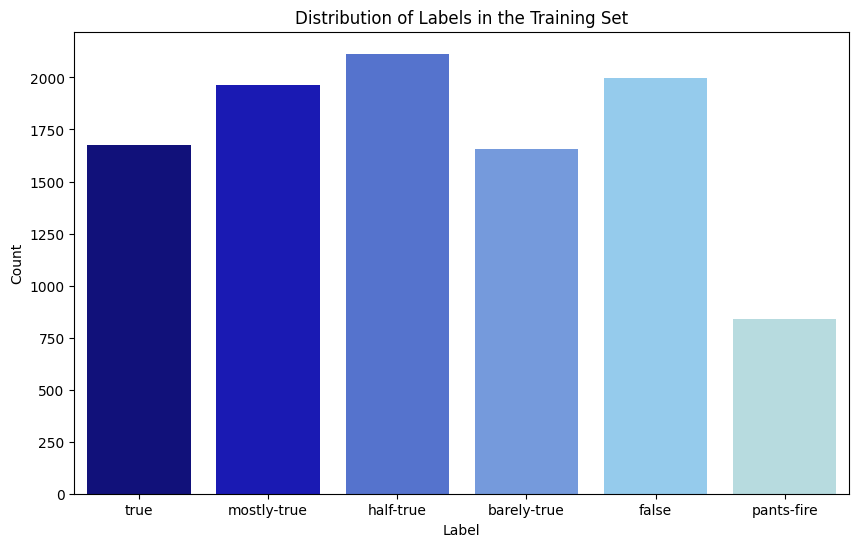

In [11]:
# Assuming train_data is your DataFrame
# Convert the labels to a categorical type if they are not already
data['label'] = data['label'].astype('category')
label_order = ['true', 'mostly-true', 'half-true', 'barely-true', 'false', 'pants-fire']

# Define the custom color palette with a gradient from dark blue to light blue
custom_palette = ['#00008B', '#0000CD', '#4169E1', '#6495ED', '#87CEFA', '#B0E0E6']

# Plot the distribution of the labels with the custom color palette
plt.figure(figsize=(10, 6))
sns.countplot(data=train_data, x='label', palette=custom_palette, order=label_order)
plt.title('Distribution of Labels in the Training Set')
plt.xlabel('Label')
plt.ylabel('Count')
plt.show()


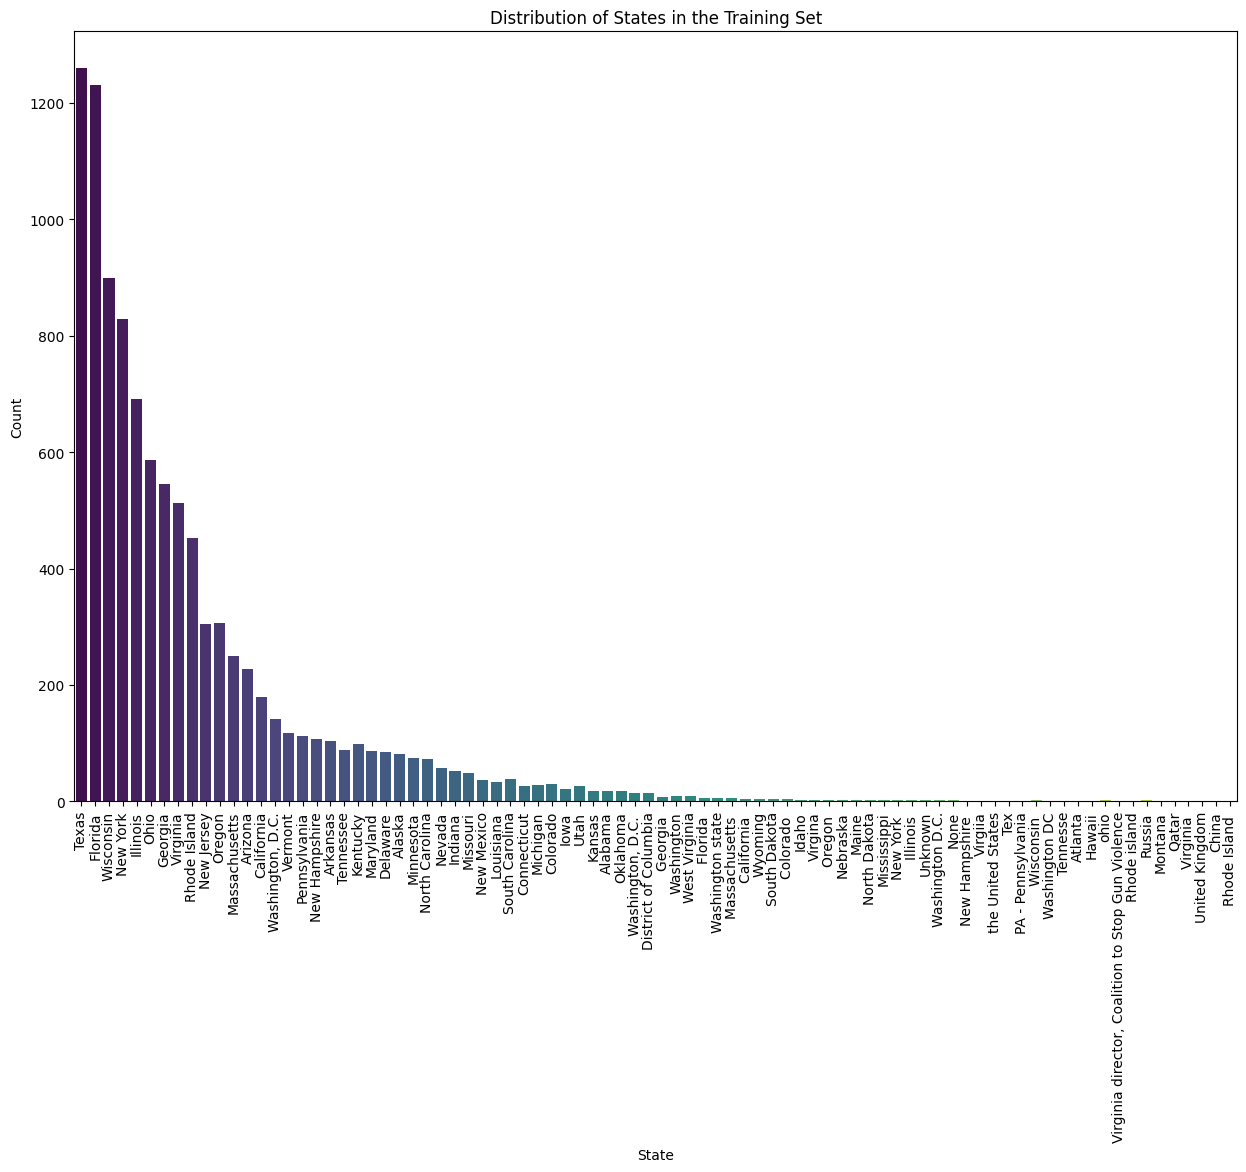

In [12]:
# plot the distribution of the states in the training set
plt.figure(figsize=(15, 10))
sns.countplot(data=data, x='state', palette='viridis', order=train_data['state'].value_counts().index)
plt.title('Distribution of States in the Training Set')
plt.xlabel('State')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()

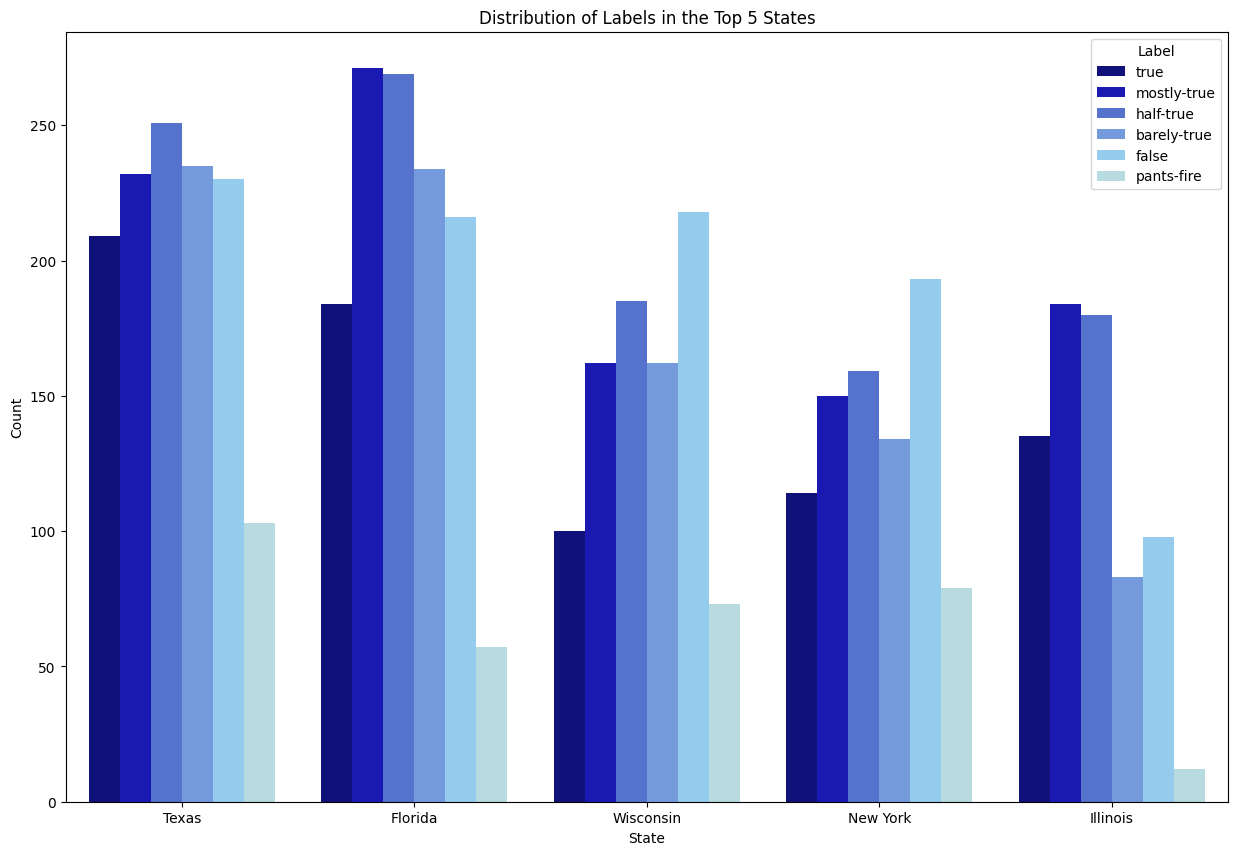

In [13]:
# show the distribution of the labels to the 5 top states
plt.figure(figsize=(15, 10))
sns.countplot(data=data, x='state', hue='label', palette=custom_palette, order=data['state'].value_counts().index[:5], hue_order=label_order)
plt.title('Distribution of Labels in the Top 5 States')
plt.xlabel('State')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.legend(title='Label')
plt.show()

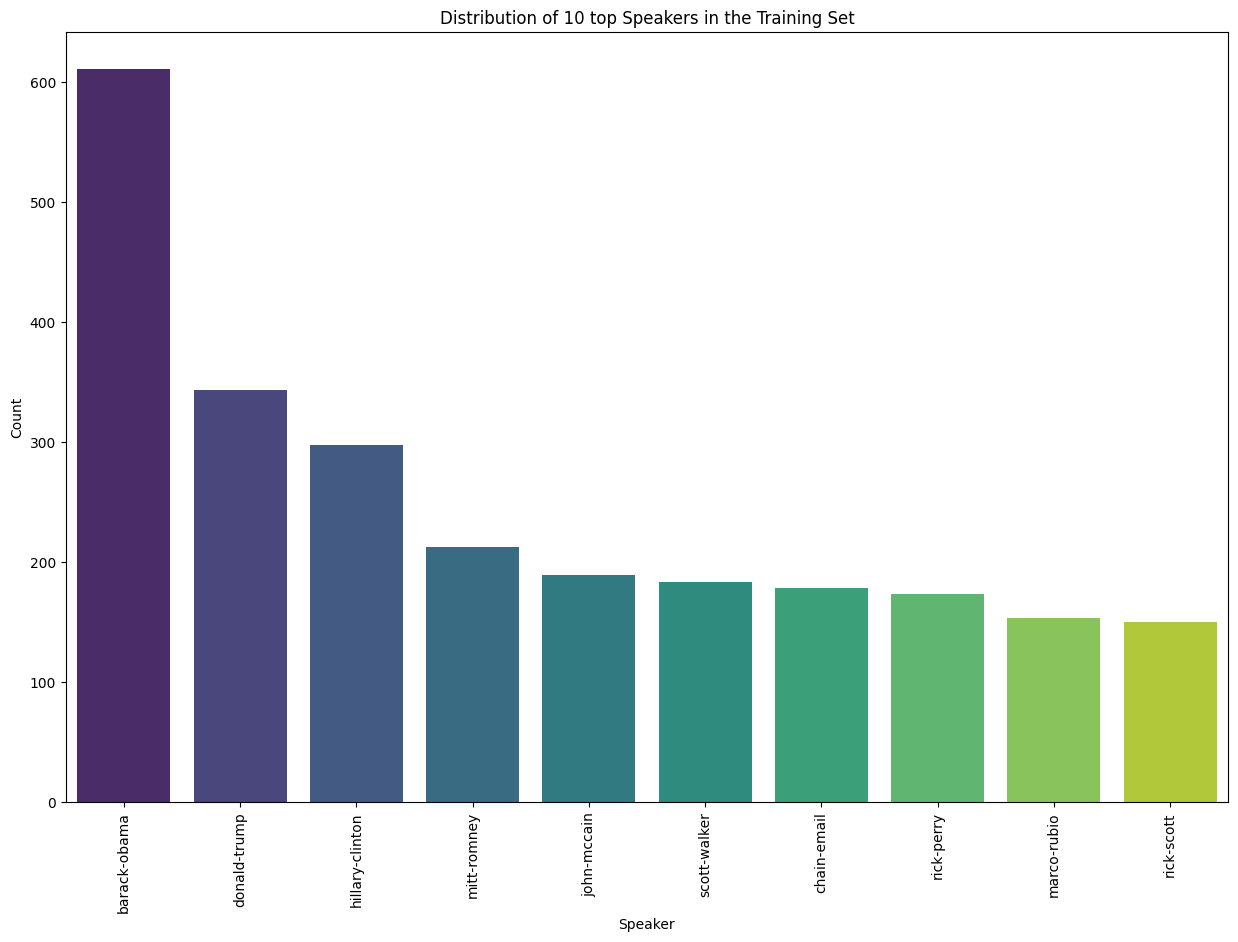

In [14]:
# plot the distribution of the states in the training set
plt.figure(figsize=(15, 10))
sns.countplot(data=data, x='speaker', palette='viridis', order=data['speaker'].value_counts().index[:10])
plt.title('Distribution of 10 top Speakers in the Training Set')
plt.xlabel('Speaker')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()

C:\Users\moshe\AppData\Local\Temp\ipykernel_5984\2847822668.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  top_speaker_data = data[train_data['speaker'] == top_speaker]


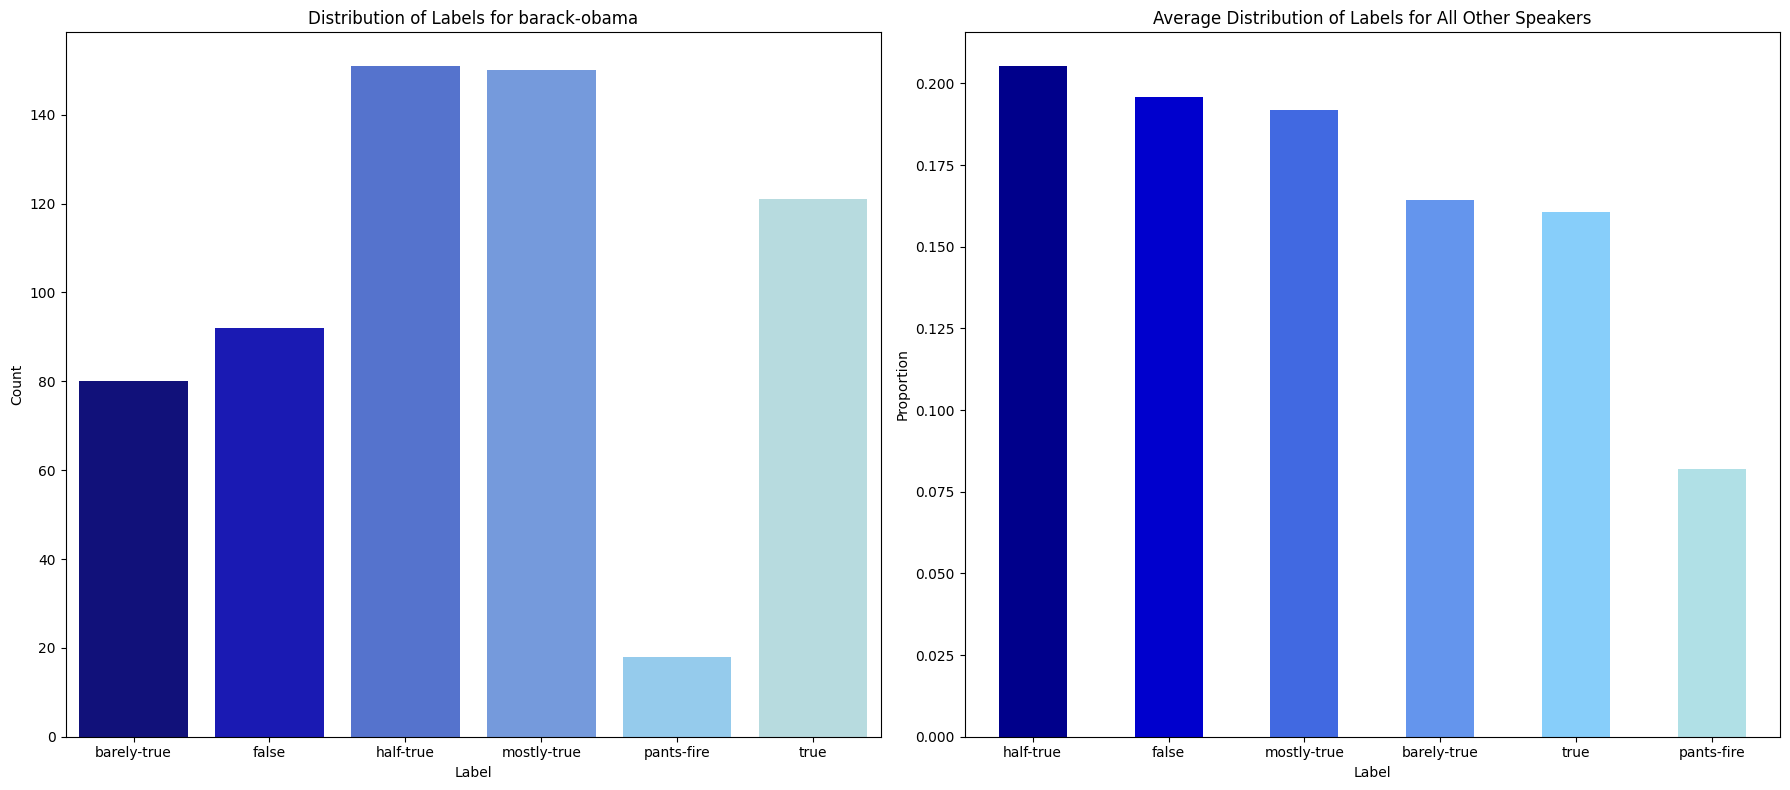

In [15]:

# Detailed analysis for the top speaker
top_speaker = data['speaker'].value_counts().idxmax()
top_speaker_data = data[train_data['speaker'] == top_speaker]
average_distribution = data['label'].value_counts(normalize=True)

# Plot the detailed analysis
fig, ax = plt.subplots(1, 2, figsize=(18, 8))

# Top speaker's label distribution
sns.countplot(data=top_speaker_data, x='label', palette=custom_palette, ax=ax[0])
ax[0].set_title(f'Distribution of Labels for {top_speaker}')
ax[0].set_xlabel('Label')
ax[0].set_ylabel('Count')

# Average distribution of labels
average_distribution.plot(kind='bar', color=custom_palette, ax=ax[1])
ax[1].set_title('Average Distribution of Labels for All Other Speakers')
ax[1].set_xlabel('Label')
ax[1].set_ylabel('Proportion')
# make the labels horizontal
plt.xticks(rotation=0)

plt.tight_layout()
plt.show()

# word length labeling.


In [16]:
data["statement"]

0       Says the Annies List political group supports ...
1       When did the decline of coal start? It started...
2       Hillary Clinton agrees with John McCain "by vo...
3       Health care reform legislation is likely to ma...
4       The economic turnaround started at the end of ...
                              ...                        
1279    For the first time in more than a decade, impo...
1280    Says Donald Trump has bankrupted his companies...
1281    John McCain and George Bush have "absolutely n...
1282    A new poll shows 62 percent support the presid...
1283    No one claims the report vindicating New Jerse...
Name: statement, Length: 12791, dtype: object

In [17]:
#statement_data = data[['statement']].copy()

# Add the index as a column
data['statement_id'] = data.index

# Calculate the length of the statement by words
data['length_statement_words'] = data['statement'].apply(lambda x: len(x.split()))

# Calculate the length of the statement by letters
data['length_statement_letters'] = data['statement'].apply(lambda x: len(x.replace(" ", "")))

# Calculate the average word length per statement
data['avg_word_length_per_statement'] = data['length_statement_letters'] / data['length_statement_words']

# Move the 'index' column to the front if needed
data = data.set_index('statement_id')

# Display the new DataFrame
data.head(100)

,label,statement,subject,speaker,job_title,state,party,barely_true_c,false_c,half_true_c,mostly_true_c,pants_on_fire_c,context,length_statement_words,length_statement_letters,avg_word_length_per_statement
statement_id,,,,,,,,,,,,,,,,
0,false,Says the Annies List political group supports ...,abortion,dwayne-bohac,State representative,Texas,republican,0.0,1.0,0.0,0.0,0.0,a mailer,11,72,6.545455
1,half-true,When did the decline of coal start? It started...,"energy,history,job-accomplishments",scott-surovell,State delegate,Virginia,democrat,0.0,0.0,1.0,1.0,0.0,a floor speech.,24,118,4.916667
2,mostly-true,"Hillary Clinton agrees with John McCain ""by vo...",foreign-policy,barack-obama,President,Illinois,democrat,70.0,71.0,160.0,163.0,9.0,Denver,19,87,4.578947
3,false,Health care reform legislation is likely to ma...,health-care,blog-posting,NaN,NaN,none,7.0,19.0,3.0,5.0,44.0,a news release,12,67,5.583333
4,half-true,The economic turnaround started at the end of ...,"economy,jobs",charlie-crist,NaN,Florida,democrat,15.0,9.0,20.0,19.0,2.0,an interview on CNN,10,45,4.500000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,barely-true,Says David Jolly supports privatizing Social S...,social-security,florida-democratic-party,NaN,Florida,democrat,5.0,4.0,4.0,5.0,3.0,a robocall to 13th Congressional District voters,7,48,6.857143
96,true,Did you know US population growth is at its lo...,"immigration,population",robert-sarvis,"lawyer, businessman",Virginia,libertarian,0.0,0.0,0.0,1.0,0.0,a tweet.,14,65,4.642857
97,mostly-true,"The average student in Florida, what they actu...",education,will-weatherford,State Representative,Florida,republican,2.0,3.0,4.0,3.0,0.0,a Board of Governors meeting,29,133,4.586207


# job title idea's


In [18]:
data["job_title"].nunique()
data["job_title"].count()

data[data["job_title"].isna()].sample(20)


,label,statement,subject,speaker,job_title,state,party,barely_true_c,false_c,half_true_c,mostly_true_c,pants_on_fire_c,context,length_statement_words,length_statement_letters,avg_word_length_per_statement
statement_id,,,,,,,,,,,,,,,,
7930,mostly-true,"Says Saudi Arabia, a U.S. ally, has paid to ex...","foreign-policy,islam,religion",russ-feingold,NaN,Wisconsin,democrat,2.0,4.0,7.0,5.0,1.0,an interview,27,131,4.851852
2974,half-true,All Aboard Florida is receiving millions in Fl...,"state-budget,transportation",charlie-crist,NaN,Florida,democrat,15.0,9.0,20.0,19.0,2.0,a fundraising email,10,60,6.000000
718,false,Says Every legislative district in the state h...,"Alcohol,economy",mark-johnson,NaN,NaN,republican,0.0,1.0,0.0,0.0,0.0,a floor speech,17,87,5.117647
238,barely-true,David Alameel is giving thousands of dollars t...,"bipartisanship,campaign-finance,candidates-bio...",kesha-rogers,NaN,Texas,democrat,1.0,0.0,1.0,0.0,0.0,an interview,19,108,5.684211
2562,true,"Because of a local version of Amendment 4, the...","economy,florida-amendments,taxes",citizens-lower-taxes-and-stronger-economy,NaN,Florida,none,1.0,0.0,2.0,0.0,1.0,an Internet ad.,24,105,4.375000
1331,true,Cobb is one of the largest school systems (in ...,"county-budget,debt,taxes",joellen-smith,NaN,Georgia,none,0.0,0.0,0.0,0.0,0.0,an editorial,15,62,4.133333
357,barely-true,"After Russia went to war with Georgia in 2008,...","foreign-policy,history,military",karl-rove,NaN,Texas,republican,2.0,5.0,2.0,8.0,0.0,"an interview on ""Fox News Sunday""",38,178,4.684211
3670,true,Obamacare was patterned after (Mitt Romneys) p...,health-care,tim-pawlenty,NaN,NaN,republican,2.0,3.0,3.0,6.0,1.0,"a debate in Ames, Iowa",9,59,6.555556
8783,pants-fire,"Says that President Obama said, Nobody made th...","military,veterans",chain-email,NaN,NaN,none,11.0,43.0,8.0,5.0,105.0,a chain e-mail,23,103,4.478261


In [11]:
# Count NaNs in each column
nan_counts = data.isna().sum()

# Summary of NaNs
nan_summary = nan_counts.describe()

# Print the NaN counts and summary
print("NaN Counts in Each Column:\n", nan_counts)
print("\nSummary of NaN Counts:\n", nan_summary)


NaN Counts in Each Column:
 statement_id          0
label                 0
statement             0
subject               2
speaker               2
job_title          3567
state              2749
party                 2
barely_true_c         2
false_c               2
half_true_c           2
mostly_true_c         2
pants_on_fire_c       2
context             131
dtype: int64

Summary of NaN Counts:
 count      14.000000
mean      461.642857
std      1154.059231
min         0.000000
25%         2.000000
50%         2.000000
75%         2.000000
max      3567.000000
dtype: float64


In [19]:

missing_state_rows = data[data['state'].isna()]

# Save the filtered data to a CSV file
# missing_state_rows.to_csv('missing_state_rows.csv', index=False)


C:\Users\moshe\AppData\Local\Temp\ipykernel_5984\4187183088.py:14: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


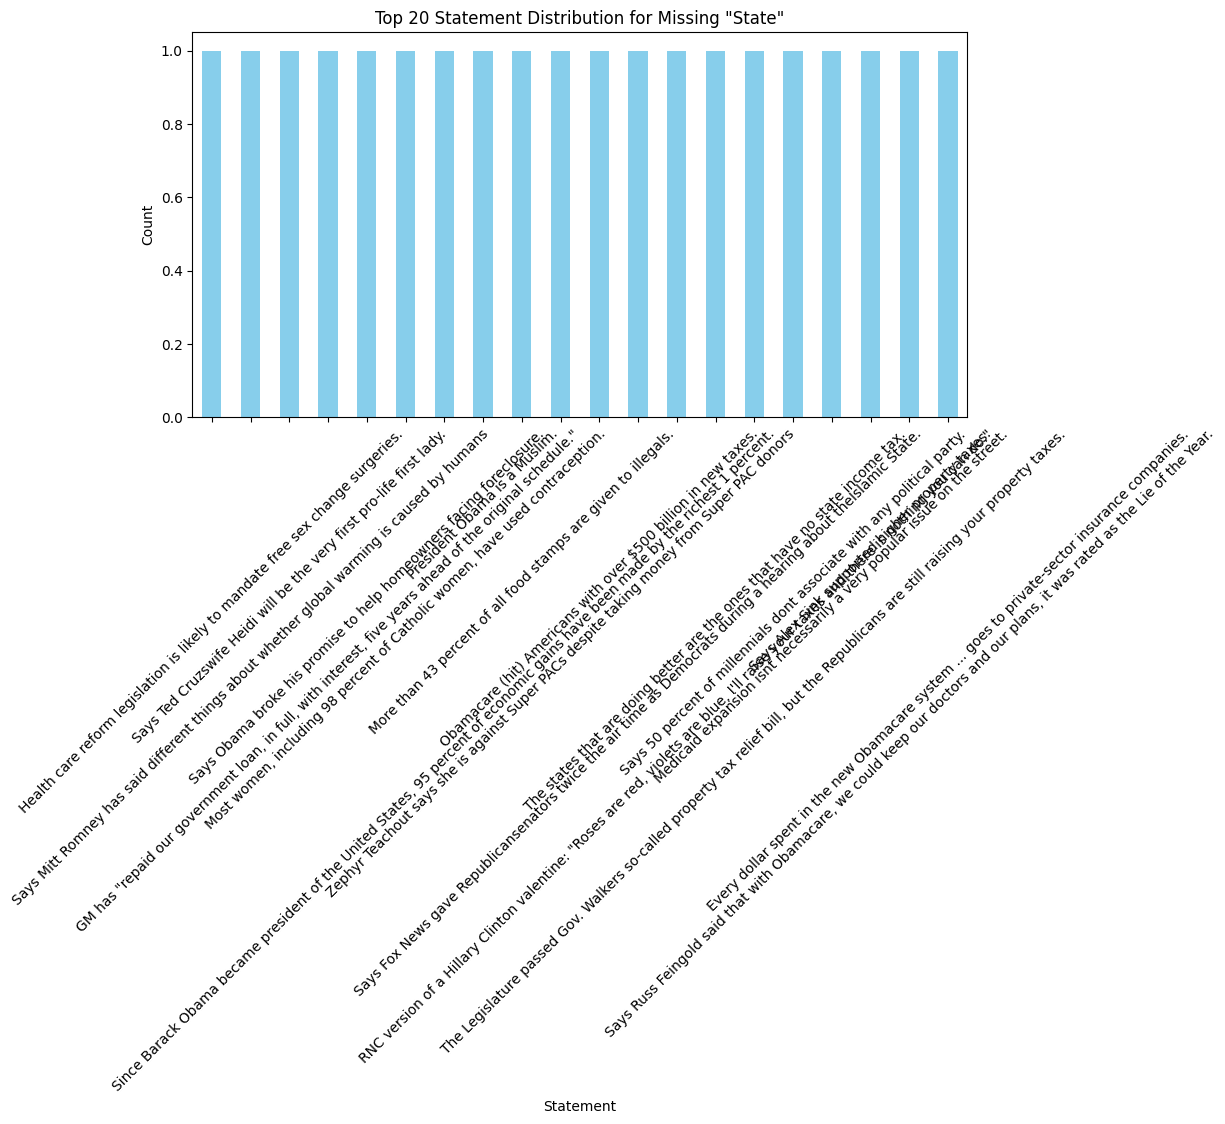

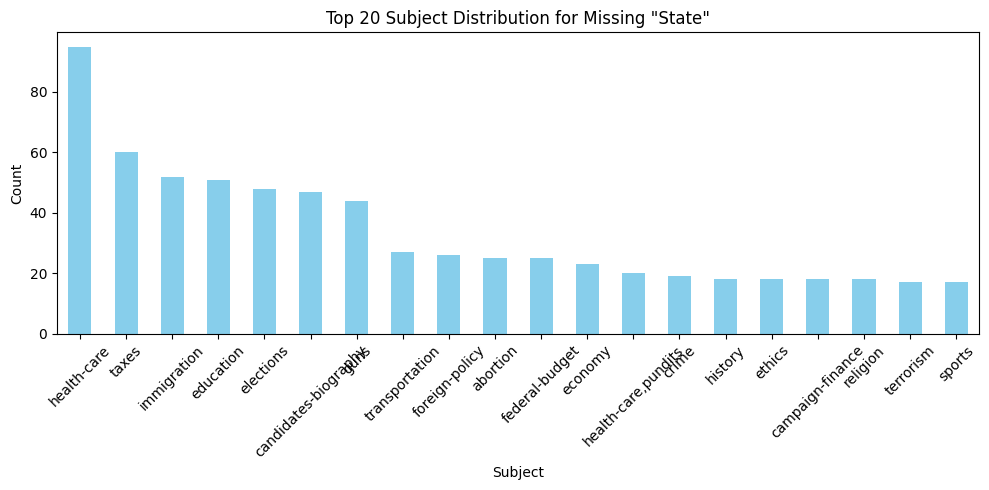

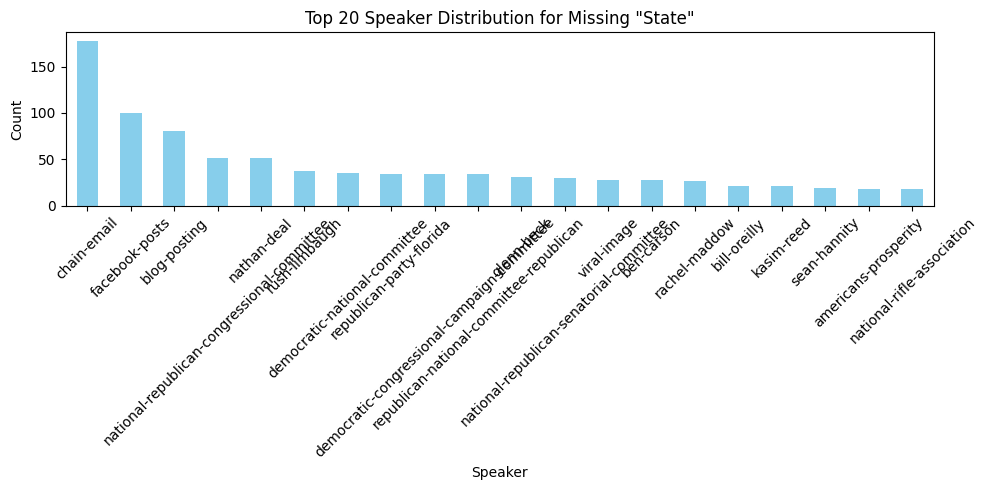

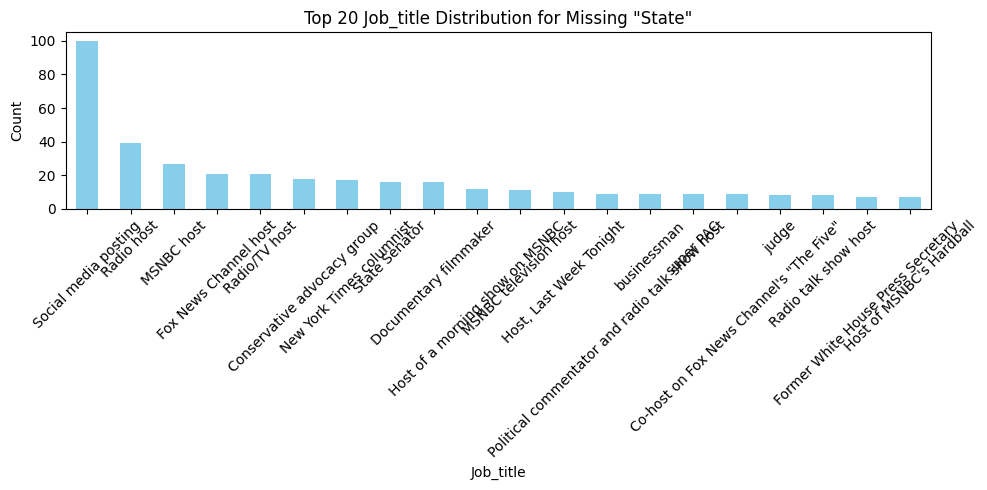

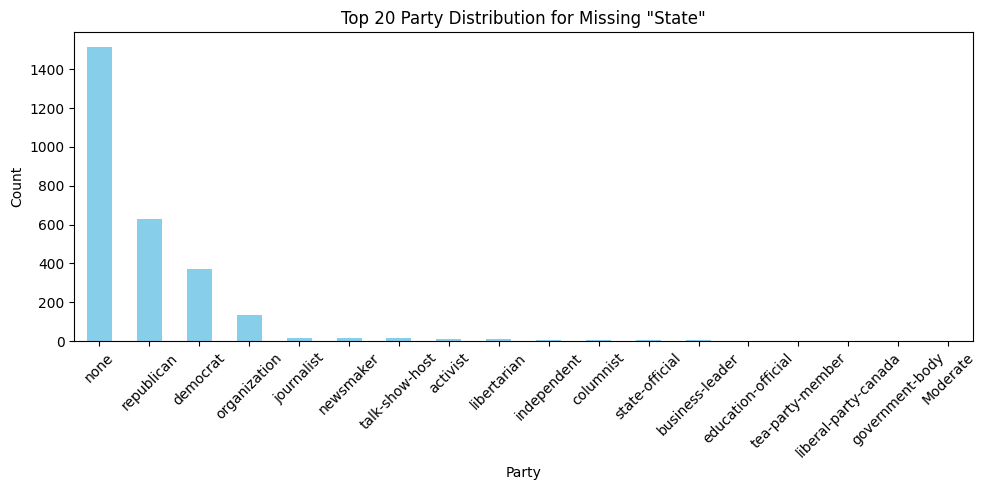

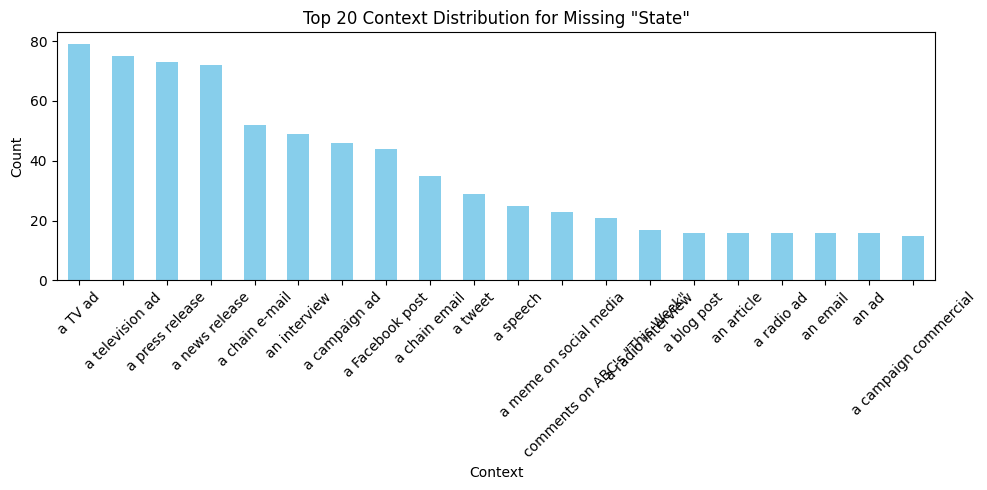

In [20]:

# Get all categorical features (excluding 'state' since it's NaN)
categorical_features = missing_state_rows.select_dtypes(include=['object']).columns.tolist()
categorical_features.remove('state')  # Exclude 'state' as it's NaN

# Generate bar plots for the top 20 values of each categorical feature
for feature in categorical_features:
    plt.figure(figsize=(10, 5))
    feature_distribution = missing_state_rows[feature].value_counts().head(20)  # Top 20 values
    feature_distribution.plot(kind='bar', color='skyblue')
    plt.title(f'Top 20 {feature.capitalize()} Distribution for Missing "State"')
    plt.xlabel(feature.capitalize())
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()


understanding "job_title", "state" and subject. 

In [64]:
# replace the unknown.
# data['job_title'].replace('unknown', pd.NA, inplace=True)

In [21]:
missing_job_title_rows = data[data['job_title'].isna()]

# Save the filtered data to a CSV file
#missing_job_title_rows.to_csv('missing_job_title_rows.csv', index=False)

C:\Users\moshe\AppData\Local\Temp\ipykernel_2460\2140467934.py:14: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


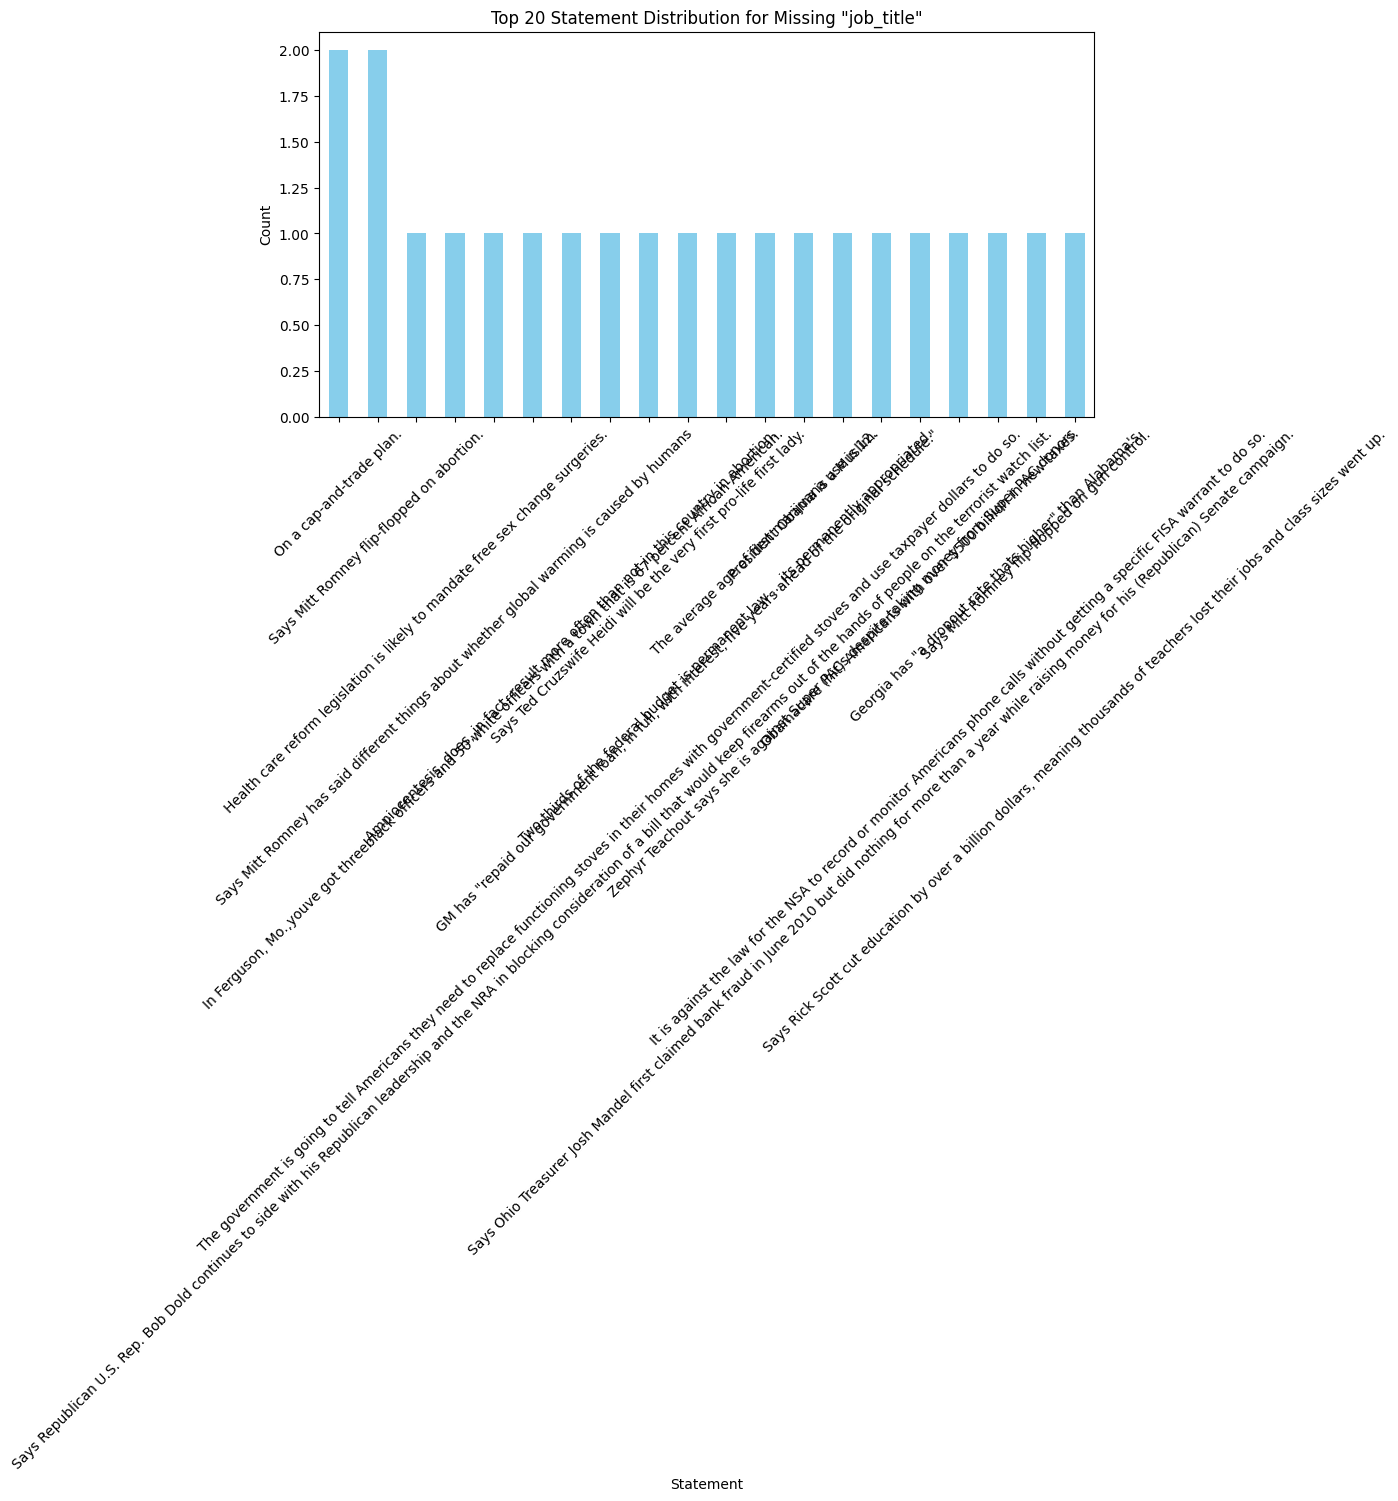

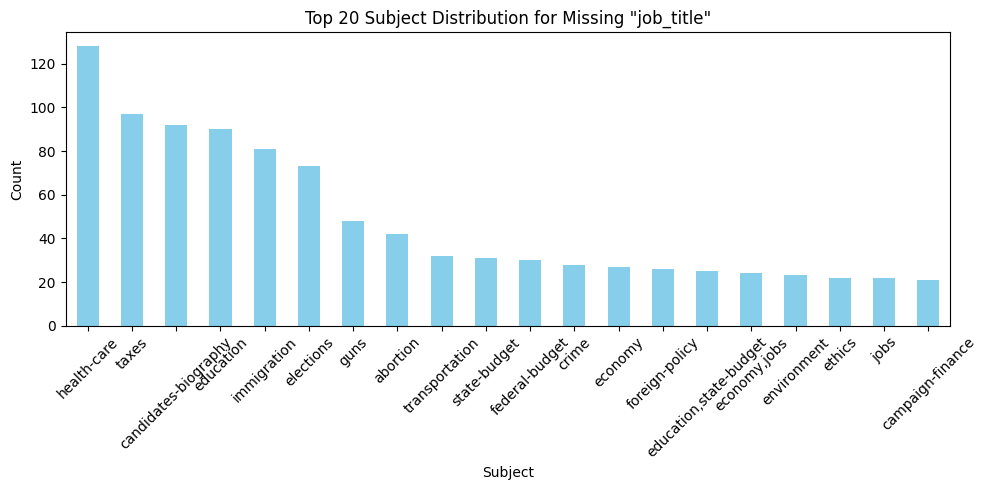

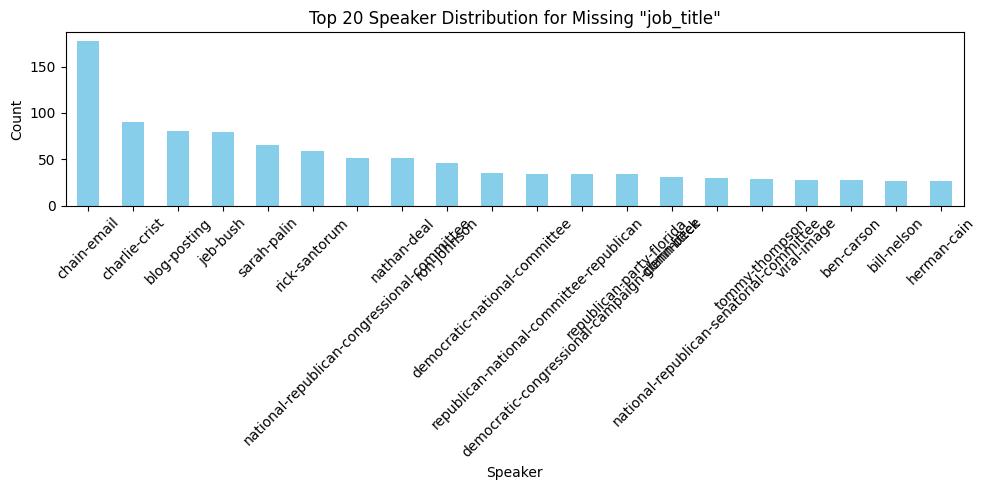

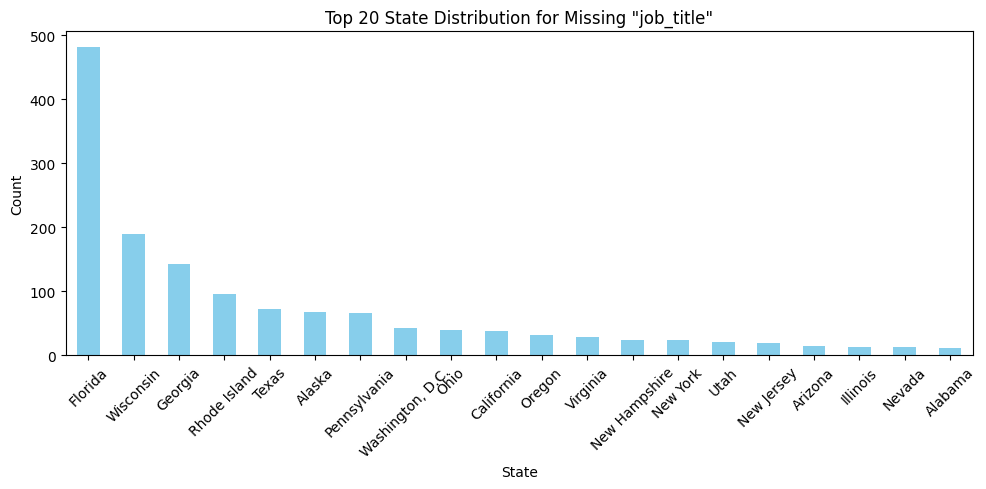

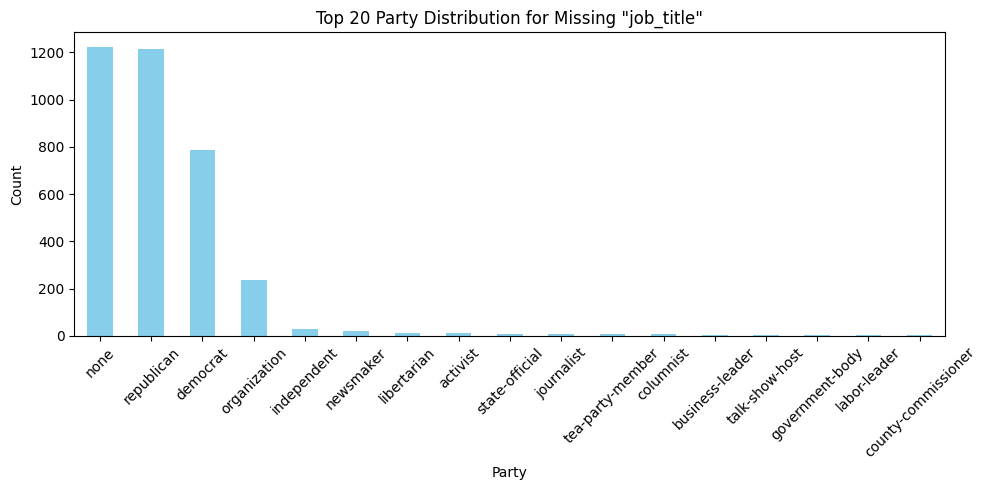

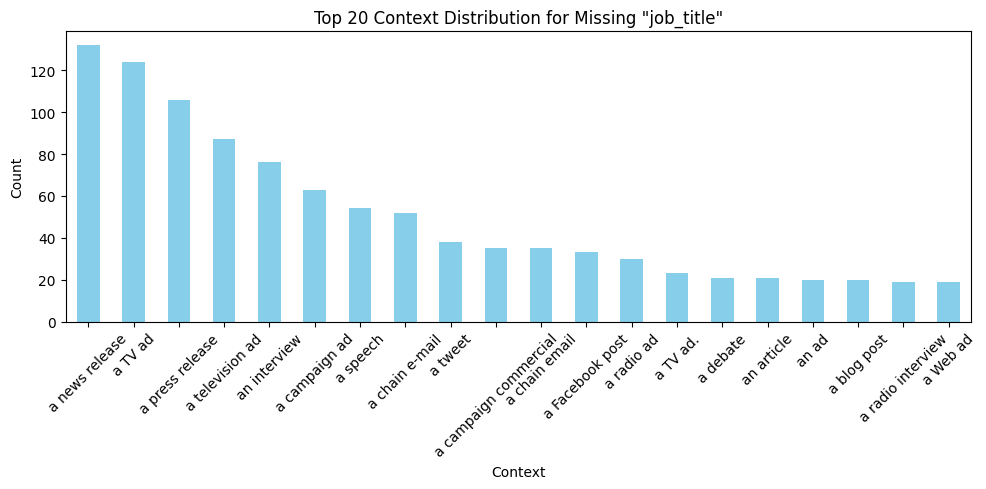

In [66]:

# Get all categorical features (excluding 'state' since it's NaN)
categorical_features = missing_job_title_rows.select_dtypes(include=['object']).columns.tolist()
categorical_features.remove('job_title')  # Exclude 'state' as it's NaN

# Generate bar plots for the top 20 values of each categorical feature
for feature in categorical_features:
    plt.figure(figsize=(10, 5))
    feature_distribution = missing_job_title_rows[feature].value_counts().head(20)  # Top 20 values
    feature_distribution.plot(kind='bar', color='skyblue')
    plt.title(f'Top 20 {feature.capitalize()} Distribution for Missing "job_title"')
    plt.xlabel(feature.capitalize())
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()


In [67]:
# option to save all the data to csv.
data.to_csv('liar_data.csv', index=False)

# Embedding of Features.

c:\Users\moshe\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
c:\Users\moshe\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


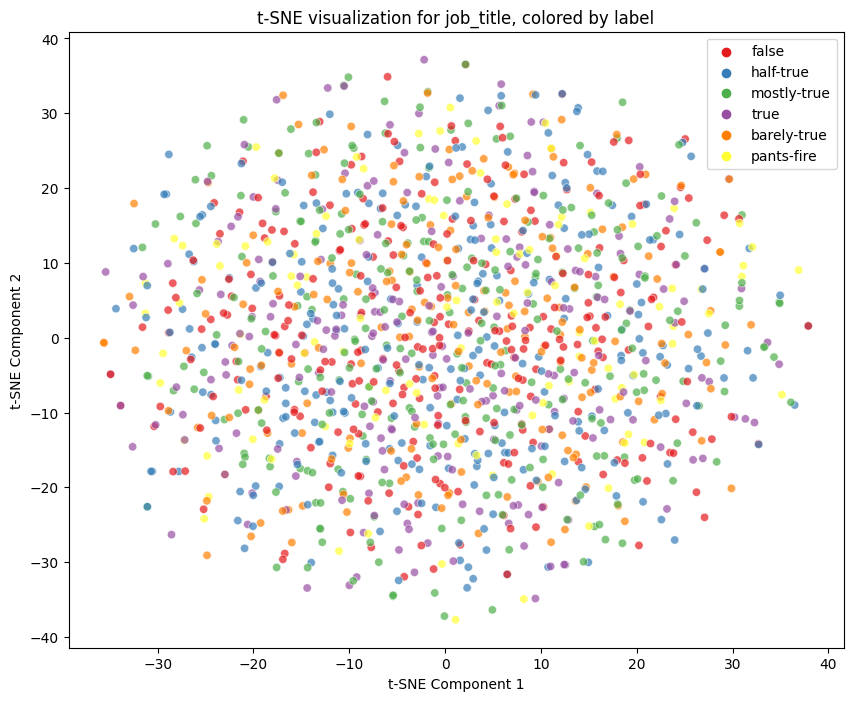

In [52]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
from gensim.models import Word2Vec
import seaborn as sns

def clean_missing_values(data, column_name):
    """
    Replaces NaN or missing values in the specified column with 'unknown', since the meaning is good for the Word2Vec.
    """
    data[column_name] = data[column_name].fillna('unknown')
    return data


def prepare_data_for_word2vec(data, column_name):
    """
    Prepares a feature column for Word2Vec by ensuring it is a list of words.
    For 'subject', which may have multiple categories, the entries are split.
    """
    if column_name == 'subject':
        # For the subject column, split by commas as there might be multiple categories
        data[column_name] = data[column_name].apply(lambda x: x.split(','))
    else:
        # For job_title and state, each entry should be treated as a list with one element
        data[column_name] = data[column_name].apply(lambda x: [x])
    return data


def train_word2vec(data, column_name, vector_size=100, window=5, min_count=1):
    """
    Trains a Word2Vec model for the given feature (column_name).
    """
    # Prepare the sentences (lists of words) for Word2Vec
    sentences = data[column_name].tolist()
    
    # Train Word2Vec model, can be fine tuned @@ SIGAL or i can look at this better
    w2v_model = Word2Vec(sentences=sentences, vector_size=vector_size, window=window, min_count=min_count, workers=4)
    
    return w2v_model

def extract_and_store_embeddings(w2v_model, data, column_name):
    """
    Extracts Word2Vec embeddings for each unique value in the feature column.
    """
    unique_values = data[column_name].explode().unique()  # Extract unique values
    embeddings = {value: w2v_model.wv[value] for value in unique_values if value in w2v_model.wv}
    
    # Return embeddings as a dictionary
    return embeddings

def visualize_embeddings(embeddings, labels, title='t-SNE visualization'):
    """
    Visualizes the embeddings using t-SNE and colors by labels.
    """
    # Extract unique words and their vectors
    words = list(embeddings.keys())
    vectors = np.array([embeddings[word] for word in words])
    
    # Apply t-SNE to reduce dimensions to 2D
    tsne = TSNE(n_components=2, random_state=42)
    vectors_2d = tsne.fit_transform(vectors)
    
    # Plot the results, colored by label
    plt.figure(figsize=(10, 8))
    sns.scatterplot(x=vectors_2d[:, 0], y=vectors_2d[:, 1], hue=labels[:len(words)], palette='Set1', legend='full', alpha=0.7)

    plt.title(title)
    plt.xlabel('t-SNE Component 1')
    plt.ylabel('t-SNE Component 2')
    plt.show()

def process_and_visualize(data, column_name, label_column):
    """
    Processes the given feature, generates Word2Vec embeddings, and visualizes using t-SNE.
    """
    # A: Clean missing values
    data = clean_missing_values(data, column_name)
    
    # B: Prepare data for Word2Vec
    data = prepare_data_for_word2vec(data, column_name)
    
    # C: Train Word2Vec model
    w2v_model = train_word2vec(data, column_name)
    
    # D: Extract embeddings
    embeddings = extract_and_store_embeddings(w2v_model, data, column_name)
    
    # E: Visualize embeddings using t-SNE, colored by labels
    visualize_embeddings(embeddings, data[label_column].values, title=f't-SNE visualization for {column_name}, colored by {label_column}')

# Example usage for 'job_title', 'state', and 'subject'
if __name__ == "__main__":
    # Load your dataset
    #file_path = 'liar_data.csv'
    #data = pd.read_csv(file_path)
    
    # Process and visualize the 'job_title' column, colored by 'label'
    process_and_visualize(data, 'job_title', 'label')
    
    


c:\Users\moshe\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
c:\Users\moshe\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


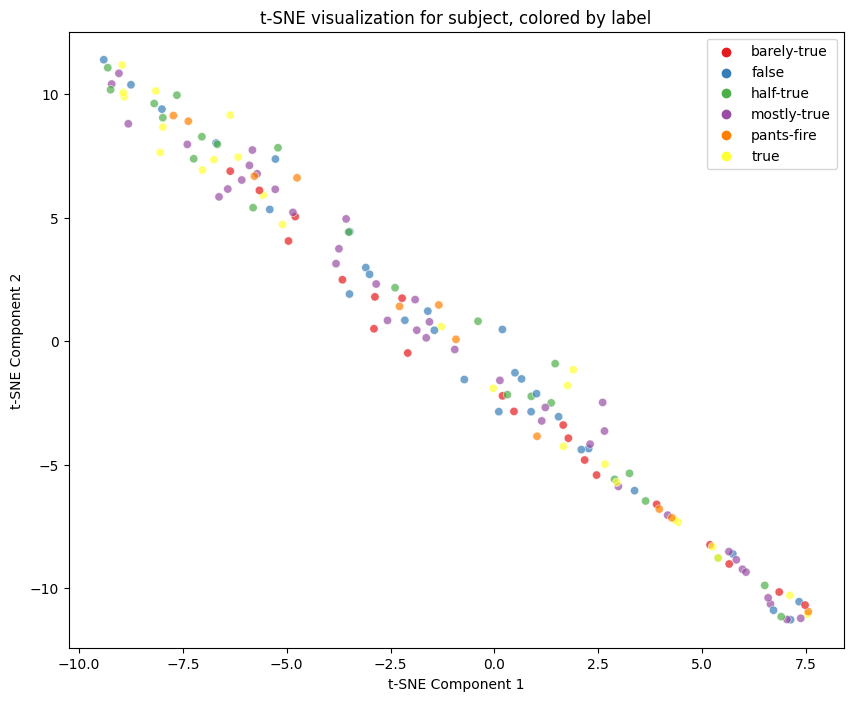

In [23]:
#process_and_visualize(data, 'state', 'label')
process_and_visualize(data, 'subject', 'label')

c:\Users\moshe\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
c:\Users\moshe\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


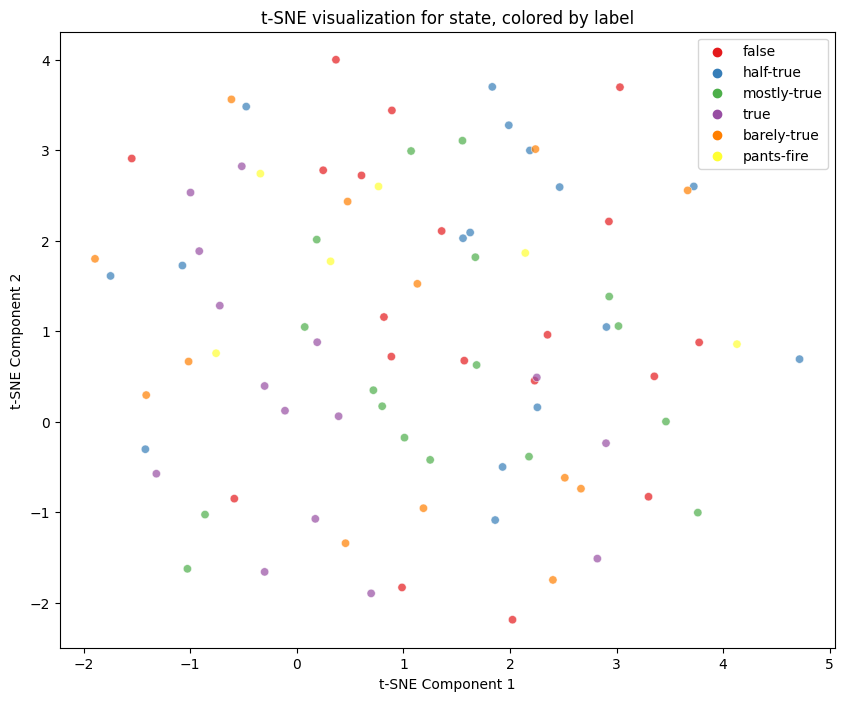

In [54]:
process_and_visualize(data, 'state', 'label')

In [55]:
data

,statement_id,label,statement,subject,speaker,job_title,state,party,barely_true_c,false_c,half_true_c,mostly_true_c,pants_on_fire_c,context
0,2635.json,false,Says the Annies List political group supports ...,abortion,dwayne-bohac,[State representative],[Texas],republican,0.0,1.0,0.0,0.0,0.0,a mailer
1,10540.json,half-true,When did the decline of coal start? It started...,"energy,history,job-accomplishments",scott-surovell,[State delegate],[Virginia],democrat,0.0,0.0,1.0,1.0,0.0,a floor speech.
2,324.json,mostly-true,"Hillary Clinton agrees with John McCain ""by vo...",foreign-policy,barack-obama,[President],[Illinois],democrat,70.0,71.0,160.0,163.0,9.0,Denver
3,1123.json,false,Health care reform legislation is likely to ma...,health-care,blog-posting,[unknown],[unknown],none,7.0,19.0,3.0,5.0,44.0,a news release
4,9028.json,half-true,The economic turnaround started at the end of ...,"economy,jobs",charlie-crist,[unknown],[Florida],democrat,15.0,9.0,20.0,19.0,2.0,an interview on CNN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1279,3419.json,half-true,"For the first time in more than a decade, impo...","energy,oil-spill,trade",barack-obama,[President],[Illinois],democrat,70.0,71.0,160.0,163.0,9.0,a press conference
1280,12548.json,mostly-true,Says Donald Trump has bankrupted his companies...,candidates-biography,hillary-clinton,[Presidential candidate],[New York],democrat,40.0,29.0,69.0,76.0,7.0,a speech on the economy
1281,401.json,true,"John McCain and George Bush have ""absolutely n...",health-care,campaign-defend-america,[unknown],"[Washington, D.C.]",none,0.0,1.0,0.0,2.0,0.0,a television ad
1282,1055.json,false,A new poll shows 62 percent support the presid...,health-care,americans-united-change,[unknown],[unknown],none,1.0,4.0,4.0,1.0,0.0,an Internet ad.


In [68]:
def replace_with_word2vec_embeddings(data, column_names):
    """
    this function runs the privous part, and saves to dataframe.
    """
    for column_name in column_names:
        # Clean missing values
        data[column_name] = data[column_name].fillna('unknown')
        
        # Prepare data for Word2Vec
        # Ensure that each entry is tokenized into words
        data[column_name] = data[column_name].apply(lambda x: str(x).replace(',', '').split())

        # Train Word2Vec model
        sentences = data[column_name].tolist()
        w2v_model = Word2Vec(sentences, vector_size=100, window=5, min_count=1, workers=4)
        
        # Create a new column to store embeddings
        embeddings = []
        
        # Extract embeddings and store them in the new column
        for values in data[column_name]:
            embedding = np.mean([w2v_model.wv[word] for word in values if word in w2v_model.wv], axis=0)
            
            if embedding is not None:  # Ensure valid embedding exists
                embeddings.append(embedding.tolist())
            else:
                embeddings.append([0] * 100)  # If no valid embedding is found, use a vector of zeros
        
        # Replace the original column with the new embedding column
        data[column_name] = embeddings
    
    return data


In [69]:
columns_to_embed = ['job_title', 'state', 'subject']

# Replace the original columns with Word2Vec embeddings
data = replace_with_word2vec_embeddings(data, columns_to_embed)


In [72]:

data['job_title'].head()
data


,statement_id,label,statement,subject,speaker,job_title,state,party,barely_true_c,false_c,half_true_c,mostly_true_c,pants_on_fire_c,context
0,2635.json,false,Says the Annies List political group supports ...,"[-0.0019442177144810557, -0.005267522297799587...",dwayne-bohac,"[0.0069243717007339, 0.057837434113025665, -0....","[9.456396219320595e-05, 0.0030773186590522528,...",republican,0.0,1.0,0.0,0.0,0.0,a mailer
1,10540.json,half-true,When did the decline of coal start? It started...,"[-0.009661536663770676, -0.0031108474358916283...",scott-surovell,"[-0.0028283465653657913, 0.042659543454647064,...","[-0.004545168019831181, -0.005647220183163881,...",democrat,0.0,0.0,1.0,1.0,0.0,a floor speech.
2,324.json,mostly-true,"Hillary Clinton agrees with John McCain ""by vo...","[-0.009500119835138321, 0.009562223218381405, ...",barack-obama,"[-0.007139015011489391, 0.0012410306371748447,...","[0.008132271468639374, -0.004457335453480482, ...",democrat,70.0,71.0,160.0,163.0,9.0,Denver
3,1123.json,false,Health care reform legislation is likely to ma...,"[-0.0005362272495403886, 0.0002364301617490127...",blog-posting,"[-0.0005362272495403886, 0.0002364301617490127...","[-0.0005362272495403886, 0.0002364301617490127...",none,7.0,19.0,3.0,5.0,44.0,a news release
4,9028.json,half-true,The economic turnaround started at the end of ...,"[-0.0051562427543103695, -0.006668338552117348...",charlie-crist,"[-0.0005362272495403886, 0.0002364301617490127...","[-0.008242678828537464, 0.009299354627728462, ...",democrat,15.0,9.0,20.0,19.0,2.0,an interview on CNN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1279,3419.json,half-true,"For the first time in more than a decade, impo...","[0.004760842304676771, 0.0027535485569387674, ...",barack-obama,"[-0.007139015011489391, 0.0012410306371748447,...","[0.008132271468639374, -0.004457335453480482, ...",democrat,70.0,71.0,160.0,163.0,9.0,a press conference
1280,12548.json,mostly-true,Says Donald Trump has bankrupted his companies...,"[-0.008727483451366425, 0.0021301603410393, -0...",hillary-clinton,"[-0.008217577822506428, 0.02811022289097309, -...","[-0.006800333969295025, 0.012317518703639507, ...",democrat,40.0,29.0,69.0,76.0,7.0,a speech on the economy
1281,401.json,true,"John McCain and George Bush have ""absolutely n...","[-0.0005362272495403886, 0.0002364301617490127...",campaign-defend-america,"[-0.0005362272495403886, 0.0002364301617490127...","[0.015095645561814308, 0.009091384708881378, 0...",none,0.0,1.0,0.0,2.0,0.0,a television ad
1282,1055.json,false,A new poll shows 62 percent support the presid...,"[-0.0005362272495403886, 0.0002364301617490127...",americans-united-change,"[-0.0005362272495403886, 0.0002364301617490127...","[-0.0005362272495403886, 0.0002364301617490127...",none,1.0,4.0,4.0,1.0,0.0,an Internet ad.
